1. Importing Dataset: The script imports the dataset from a CSV file using pandas and displays the first 10 rows to get an initial understanding of the data.

2. Overview of Dataset: Provides an overview of the dataset, including information about the columns and their data types.

3. Statistical Description: Calculates basic statistics like count, mean, standard deviation, minimum, and maximum values for numerical columns.

4. Length of Speeches: Calculates the length of the 'Description' column and provides statistical descriptions of the length.

5. Stats About Text Fields: Provides statistics for text fields using the `describe()` function for object type columns.

6. Checking for Missing Values: Checks for missing values in the dataset.

7. Filling Missing Data: Fills missing values in selected columns with 'unknown'.

8. Splitting Date Column: Splits the 'Release_Date' column into 'Released_Month' and 'Released_Year' for better analysis.

9. Uppercase Text: Converts text in selected columns to uppercase for consistency.

10. Filtering Data: Filters data to find directors with 'JOHN' in their names.

11. Visualization: Visualizes the distribution of speech lengths using boxplots, histograms, and categorical plots.

12. Tokenization: Defines functions to tokenize text and remove stop words.

13. Pipeline for Text Preparation: Constructs a pipeline to prepare text data by applying lowercase conversion, tokenization, and stop word removal.

14. Applying Pipeline: Applies the text preparation pipeline to the 'Description' column in the dataset.

15. Word Frequency Analysis: Analyzes word frequency using the Counter class and constructs a DataFrame to display the most common words.

16. Word Cloud: Generates word clouds to visualize the most common words in the dataset, one with a black background and the other with a white background.

In [32]:
## importing datasets

import numpy as np        
import pandas as pd  

df = pd.read_csv(r"C:\Users\Mouni\Downloads\file.csv")

df.head(10)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [33]:
## overview of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [34]:
## checking datatypes

df.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [35]:
## statistical description

df.describe()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [36]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [37]:
##  Length of speeches

df['length'] = df['Description'].str.len()
df.describe()

,length
count,7789.000000
mean,143.095134
std,10.617918
min,61.000000
25%,140.000000
50%,146.000000
75%,149.000000
max,248.000000


In [38]:
## Stats about text fields

df.describe(include='O')

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [39]:
## checking for missing values

df.isna().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
length             0
dtype: int64

In [40]:
## filling the missing data

df['Director'].fillna('unknown',inplace=True)
df['Cast'].fillna('unknown',inplace=True)
df['Country'].fillna('unknown',inplace=True)
df['Release_Date'].fillna('unknown',inplace=True)
df['Rating'].fillna('unknown',inplace=True)
df['Release_Date'].fillna('unknown',inplace=True)
df['Rating'].fillna('unknown',inplace=True)
df.isna().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
length          0
dtype: int64

In [ ]:
# Splitting the 'Release_Date' column into 'Month' and 'Year'
df[['Released_Month', 'Released_Year']] = df['Release_Date'].str.split(', ', expand=True)

# Displaying the updated DataFrame
print(df.head())

In [41]:
## Now uppercase text

df['Director']=df['Director'].str.upper()
df['Type'] = df['Type'].str.upper()
df['Description'] = df['Description'].str.upper()

In [42]:
## inserting speakers with ‘BUSH’ in them:

df[df['Director'].str.contains('JOHN')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,length
14,s15,Movie,3022,JOHN SUITS,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",R,91 min,"INDEPENDENT MOVIES, SCI-FI & FANTASY, THRILLERS",STRANDED WHEN THE EARTH IS SUDDENLY DESTROYED ...,144
151,s152,Movie,A Boy Called Po,JOHN ASHER,"Christopher Gorham, Julian Feder, Kaitlin Doub...",United States,"January 15, 2018",PG,94 min,"DRAMAS, SCI-FI & FANTASY","AFTER HIS WIFE'S DEATH, AN OVERWORKED ENGINEER...",154
160,s161,Movie,A Christmas Prince: The Royal Baby,JOHN SCHULTZ,"Rose McIver, Ben Lamb, Alice Krige, Honor Knea...",United States,"December 5, 2019",TV-PG,85 min,"CHILDREN & FAMILY MOVIES, DRAMAS, ROMANTIC MOVIES",CHRISTMAS BRINGS THE ULTIMATE GIFT TO ALDOVIA:...,150
161,s162,Movie,A Christmas Prince: The Royal Wedding,JOHN SCHULTZ,"Rose McIver, Ben Lamb, Alice Krige, Simon Dutt...",United States,"November 30, 2018",TV-PG,93 min,"CHILDREN & FAMILY MOVIES, DRAMAS, ROMANTIC MOVIES","A YEAR AFTER HELPING RICHARD SECURE THE CROWN,...",143
164,s165,Movie,A Cinderella Story: Christmas Wish,MICHELLE JOHNSTON,"Laura Marano, Gregg Sulkin, Isabella Gomez, Jo...",United States,"December 1, 2019",PG,86 min,"CHILDREN & FAMILY MOVIES, COMEDIES, MUSIC & MU...",DESPITE HER VAIN STEPMOTHER AND MEAN STEPSISTE...,143
...,...,...,...,...,...,...,...,...,...,...,...,...
7472,s7471,Movie,Walt Disney Animation Studios Short Films Coll...,"CHRIS BUCK, JENNIFER LEE, PATRICK OSBORNE, LAU...","Kristen Bell, Josh Gad, Jonathan Groff, Idina ...",United States,"October 25, 2015",TV-Y,90 min,CHILDREN & FAMILY MOVIES,THIS COLLECTION OF 12 SHORT FILMS FROM DISNEY ...,150
7482,s7481,Movie,War on Everyone,JOHN MICHAEL MCDONAGH,"Alexander Skarsgård, Michael Peña, Theo James,...",United Kingdom,"December 3, 2019",R,98 min,"ACTION & ADVENTURE, COMEDIES",TERRY AND BOB EXCEL AT BLACKMAILING SMALL-TIME...,149
7606,s7605,Movie,Whitney Cummings: Money Shot,JOHN FORTENBERRY,Whitney Cummings,United States,"January 1, 2019",TV-MA,48 min,STAND-UP COMEDY,COMEDY CENTRAL ROAST VETERAN WHITNEY CUMMINGS ...,145
7637,s7636,Movie,Winter of Our Dreams,JOHN DUIGAN,"Judy Davis, Bryan Brown, Cathy Downes, Baz Luh...",Australia,"November 1, 2016",NR,86 min,"CLASSIC MOVIES, DRAMAS","AFTER THE DEATH OF A LONG-AGO LOVER, MARRIED P...",150


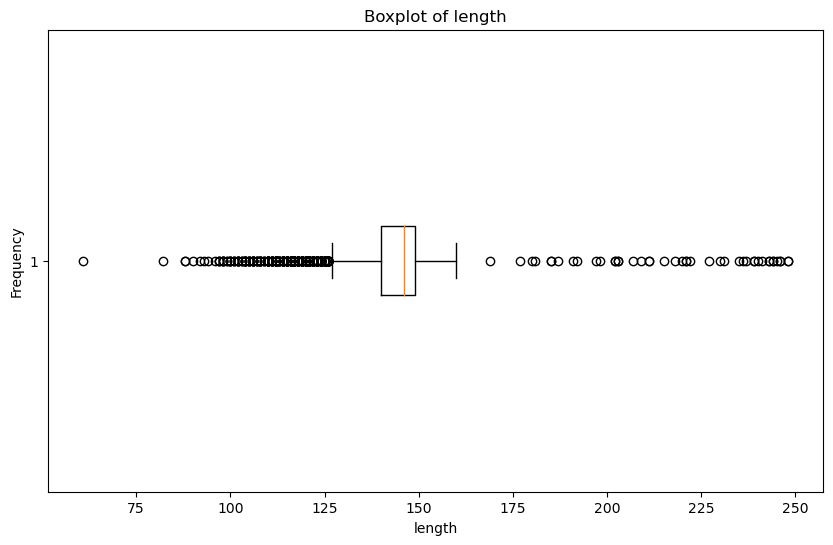

In [13]:
## boxplot

import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(df['length'].dropna(), vert = False)
plt.title('Boxplot of length')
plt.xlabel('length')
plt.ylabel('Frequency')
plt.show()

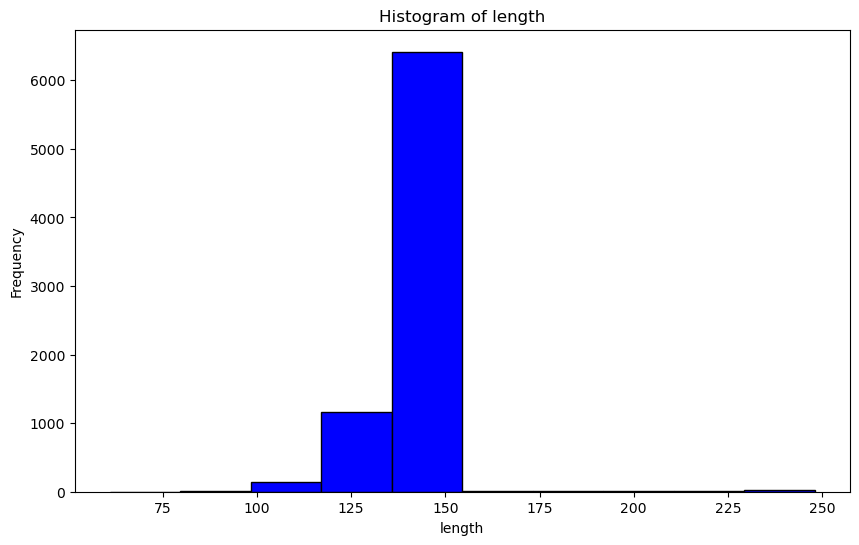

In [14]:
## histogram

plt.figure(figsize=(10, 6))
plt.hist(df['length'].dropna(), color='blue', edgecolor='black')
plt.title('Histogram of length')
plt.xlabel('length')
plt.ylabel('Frequency')
plt.show()

C:\Users\Mouni\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


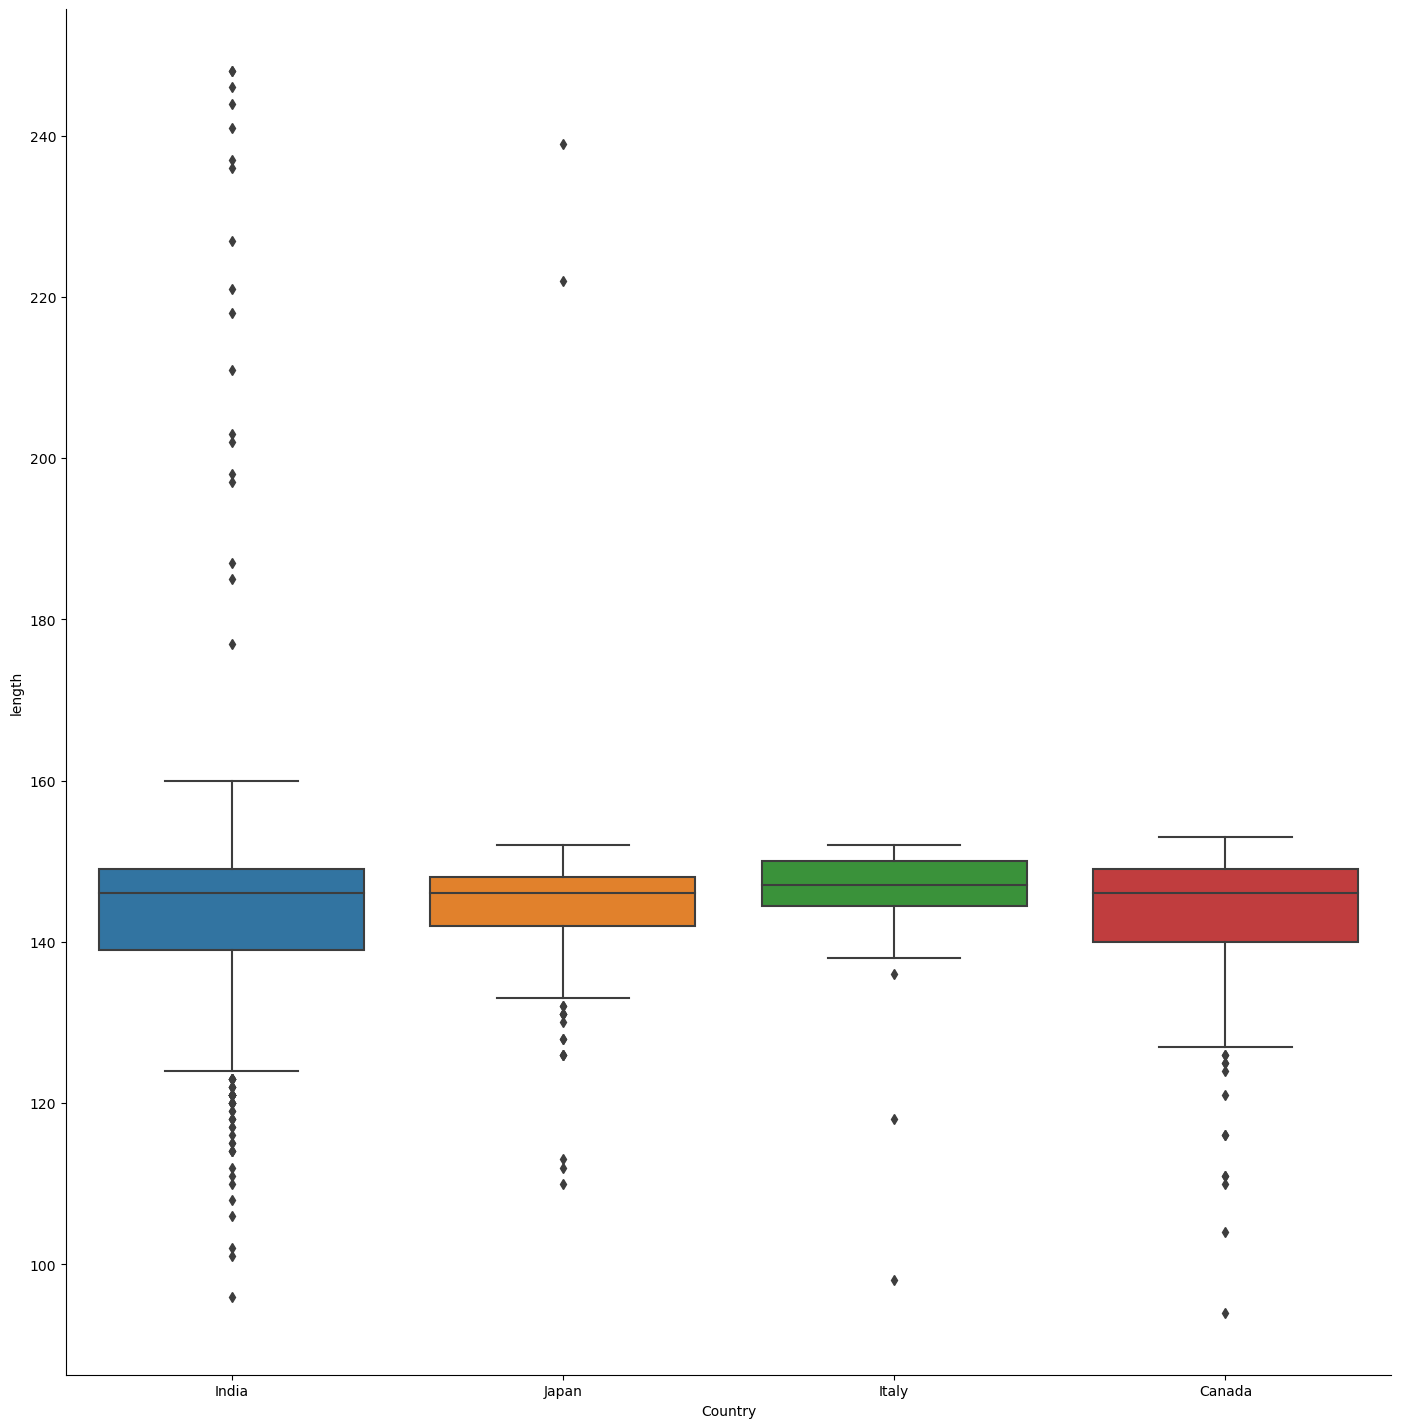

In [15]:
##  categorical plot

import seaborn as sns

where = df['Country'].isin(['India', 'Japan', 'United states', 'Italy', 'Canada'])
g = sns.catplot(data=df[where], x="Country", y="length", kind='box')
g.fig.set_size_inches(16, 16) 


In [16]:
## Function to tokenize:

import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [17]:
testtext = "Watch Netflix movies & TV shows online or stream right to your smart TV, PC, Mac, mobile, tablet and more! www.netflix.com"
testtokens = tokenize(testtext)

print(testtokens)

['Watch', 'Netflix', 'movies', 'TV', 'shows', 'online', 'or', 'stream', 'right', 'to', 'your', 'smart', 'TV', 'PC', 'Mac', 'mobile', 'tablet', 'and', 'more', 'www', 'netflix', 'com']


# # Remove stop words

In [18]:
## to remove stop words

import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{"that'll", 'about', 'very', 'she', 'ma', 'them', 'where', 'do', 'isn', 'here', 'does', "you'd", 'i', 'too', 'weren', 'o', 'the', 'is', 'being', 'over', 'its', 'off', 'didn', "isn't", 'her', 'can', 'as', 'nor', 'don', 'on', 's', 'or', 'whom', 'only', 'some', 'just', 'theirs', "hasn't", 'him', 'mustn', "couldn't", "haven't", 'for', 'any', 'are', 'by', "doesn't", 'above', 'what', 't', "don't", 're', 'while', 'd', 'm', 'in', 'hers', 'and', 'into', 'himself', 'wasn', 'our', 'during', 'again', "didn't", 'up', 'haven', 'all', 'doing', "wouldn't", 'were', 'hasn', 'these', 'yourself', "shan't", 'how', 'same', 'me', "mustn't", 'll', 'y', 'should', 'that', 'out', 'be', 'mightn', 'both', 'doesn', 'themselves', 'there', 'won', 'down', 'to', 'he', 'they', 'has', 'had', 'between', 'couldn', 'ourselves', 'having', 'did', "aren't", 'under', 'was', 'then', 'if', "hadn't", 'yours', 'needn', "wasn't", 'of', 'his', 'below', 'such', 'been', 'once', 'my', 'myself', 'your', 'other', "she's", 'which', 'when',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mouni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
## Function to remove stop words

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

#Just testing it

cleantokens= remove_stop(testtokens)
print(cleantokens)

['Watch', 'Netflix', 'movies', 'TV', 'shows', 'online', 'stream', 'right', 'smart', 'TV', 'PC', 'Mac', 'mobile', 'tablet', 'www', 'netflix', 'com']


In [20]:
## make a “pipeline”

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

In [21]:
## Run the pipeline

df['tokens'] = df['Description'].apply(prepare, pipeline=pipeline)

In [22]:
## Count the tokens

df['num_tokens'] = df['tokens'].map(len)
df.tail()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Released_Month,Released_Year,length,tokens,num_tokens
7784,s7783,Movie,Zozo,JOSEF FARES,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"DRAMAS, INTERNATIONAL MOVIES",WHEN LEBANON'S CIVIL WAR DEPRIVES ZOZO OF HIS ...,October 19,2020,146,"[lebanon, civil, war, deprives, zozo, family, ...",14
7785,s7784,Movie,Zubaan,MOZEZ SINGH,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"DRAMAS, INTERNATIONAL MOVIES, MUSIC & MUSICALS",A SCRAPPY BUT POOR BOY WORMS HIS WAY INTO A TY...,March 2,2019,135,"[scrappy, poor, boy, worms, way, tycoon, dysfu...",13
7786,s7785,Movie,Zulu Man in Japan,UNKNOWN,Nasty C,unknown,"September 25, 2020",TV-MA,44 min,"DOCUMENTARIES, INTERNATIONAL MOVIES, MUSIC & M...","IN THIS DOCUMENTARY, SOUTH AFRICAN RAPPER NAST...",September 25,2020,148,"[documentary, south, african, rapper, nasty, c...",15
7787,s7786,TV Show,Zumbo's Just Desserts,UNKNOWN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"INTERNATIONAL TV SHOWS, REALITY TV",DESSERT WIZARD ADRIANO ZUMBO LOOKS FOR THE NEX...,October 31,2020,147,"[dessert, wizard, adriano, zumbo, looks, next,...",15
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,SAM DUNN,unknown,"United Kingdom, Canada, United States","March 1, 2020",TV-MA,90 min,"DOCUMENTARIES, MUSIC & MUSICALS",THIS DOCUMENTARY DELVES INTO THE MYSTIQUE BEHI...,March 1,2020,141,"[documentary, delves, mystique, behind, blues-...",13


# # Word frequencyAnalysis

In [23]:
## Use the “Counter”

from collections import Counter

tokens = tokenize("I love listening to music and going for long walks.")

testcount= Counter(tokens)

print(testcount)

Counter({'I': 1, 'love': 1, 'listening': 1, 'to': 1, 'music': 1, 'and': 1, 'going': 1, 'for': 1, 'long': 1, 'walks': 1})


In [24]:
## adding new data to the currentcount:

more_tokens = tokenize("She likes chocolates and sweets.")
testcount.update(more_tokens)

print(testcount)

Counter({'and': 2, 'I': 1, 'love': 1, 'listening': 1, 'to': 1, 'music': 1, 'going': 1, 'for': 1, 'long': 1, 'walks': 1, 'She': 1, 'likes': 1, 'chocolates': 1, 'sweets': 1})


In [25]:
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('life', 707), ('young', 655), ('new', 603), ('family', 550), ('world', 478)]


In [26]:
## word frequency in it’s owndataframe for analysis

freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

In [27]:
## sort and display

freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
life,707
young,655
new,603
family,550
world,478
man,473
love,442
two,435
woman,427


In [28]:
##  Stats!

freq_df.describe()

,freq
count,19055.000000
mean,5.840094
std,19.496773
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,707.000000


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

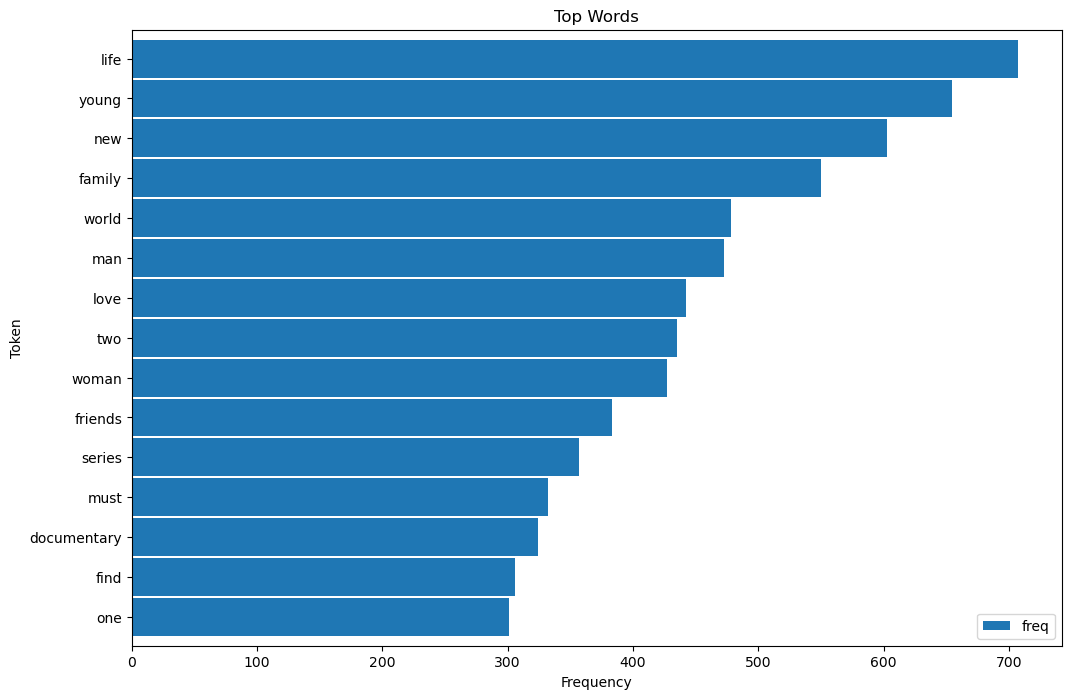

In [29]:
## Bar chart

ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

# # Word Cloud

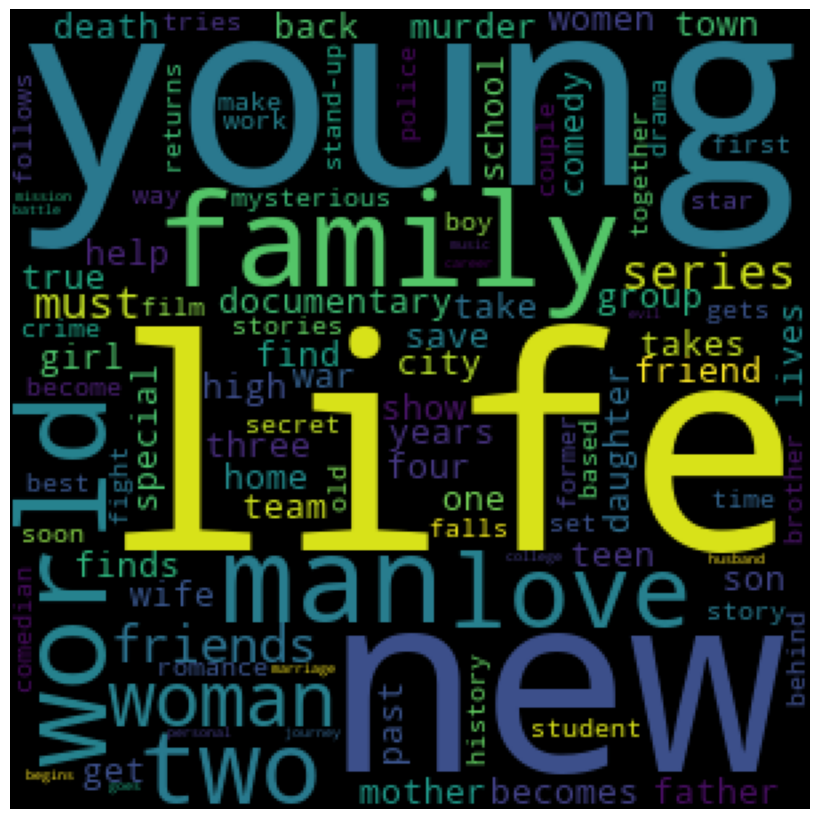

In [30]:
## word cloud

!pip install wordcloud

from wordcloud import WordCloud
from matplotlib import pyplot as plt




wc = WordCloud(background_color='black', width = 300, height=300,max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

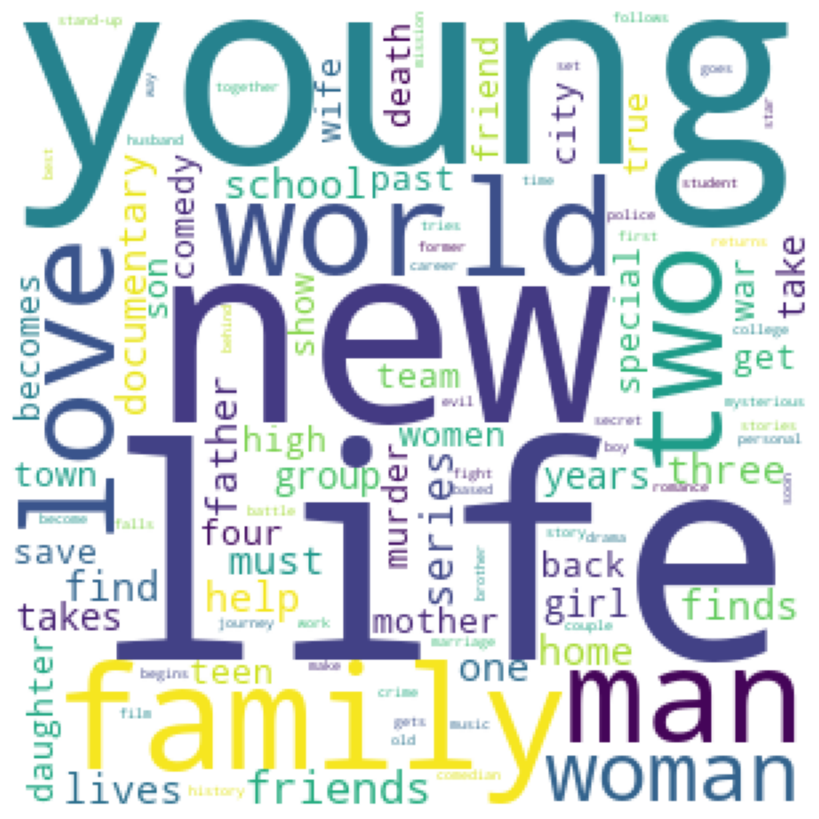

In [31]:
wc = WordCloud(background_color='white', width = 300, height=300,max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()